<a href="https://colab.research.google.com/github/ehabsameh/Congressional-analytics/blob/main/Labor_force_participation_rate_by_state_vs_political_affiliation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I would like for you to create a short analysis that can be presented in 5 minutes with a partner of your choosing. The analysis should query some additional ACS data from what I did in my example and take a different spin at the data. In your presentation, you will present your notebook, share your initial hypothesis, share the data and analysis you found to test your hypothesis, and explain what your conclusion was after reviewing the data. You will present your analysis on Thursday, January 26th.

We hypothesize that congressional districts with lower labor force participation will likely be Republican leaning. Given that Republicans in the past few years have run on platforms promising jobs for regions which have experienced loss of industry. 


Ehab - WE could establish our hypothesis around the assumption that unemployment benefits/aids policies supported by democrats and widely adapted in Red states is leading to higher unemployment rates

#### Variable Names:

https://api.census.gov/data/2021/acs/acs1/variables.html

            
### Our variables:
B23025_001E: EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER \
            Estimate!!Total: \
B23025_007E: EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER \
            Estimate!!Total:!!Not in labor force \
B23025_002E: EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER \
            Estimate!!Total:!!In labor force 

In [28]:
url="https://api.census.gov/data/2021/acs/acs1?get=NAME,B23025_001E,B23025_007E,B23025_002E&for=congressional%20district:*&in=state:*"
response = urlopen(url)
data_json = json.loads(response.read())
data_json.pop(0)
cols = ['District Name','Total Households','Not in labor force', 'In labor force', 'State code', 'district number']
acs_df = pd.DataFrame(data_json, columns = cols)
acs_df[['District', 'State']] = acs_df['District Name'].str.split(',', expand=True)
acs_df['district number'] = pd.to_numeric(acs_df['district number'])
acs_df['State'] = acs_df['State'].str.strip()
acs_df = acs_df[['Total Households', 'Not in labor force', 'In labor force', 'district number', 'State']]
acs_df.head()

,Total Households,Not in labor force,In labor force,district number,State
0,589171,225060,364111,10,Michigan
1,624753,265753,359000,4,Mississippi
2,541190,215463,325727,14,Michigan
3,595469,270347,325122,1,Michigan
4,591680,254348,337332,3,Mississippi


In [29]:
# Convert the number columns into number data types so we can math on them
acs_df["Total Households"] = pd.to_numeric(acs_df["Total Households"])
acs_df["Not in labor force"] = pd.to_numeric(acs_df["Not in labor force"])
acs_df['In labor force'] = pd.to_numeric(acs_df['In labor force'])

acs_df['% of households not in labor force'] = (100*acs_df['Not in labor force'])/acs_df['Total Households']
acs_df['% of households in labor force'] = (100*acs_df['In labor force'])/acs_df['Total Households']
acs_df.head()

,Total Households,Not in labor force,In labor force,district number,State,% of households not in labor force,% of households in labor force
0,589171,225060,364111,10,Michigan,38.199436,61.800564
1,624753,265753,359000,4,Mississippi,42.537291,57.462709
2,541190,215463,325727,14,Michigan,39.812820,60.187180
3,595469,270347,325122,1,Michigan,45.400684,54.599316
4,591680,254348,337332,3,Mississippi,42.987426,57.012574


In [30]:
import pandas as pd
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt
import plotly.express as px
from urllib import request
import json
import numpy as np

### Party affiliation data

In [31]:
# read from the congressional data and put into a pandas dataframe
party_df = pd.read_csv("http://goodcsv.com/wp-content/uploads/2020/08/us-house-of-representatives-2020.csv", encoding = "ISO-8859-1")

# extract the district number from the data (it was in the format of 5th and we want that to just be 5) using a regular expression.
party_df['district number'] = party_df['District/Position'].str.extract('(\d+)')
party_df['district number'] = party_df['district number'].fillna(0)
party_df['district number'] = pd.to_numeric(party_df['district number'])
party_df['State'] = party_df['State/Territory']
party_df['State'] = party_df['State'].str.strip()
party_df['Party'] = party_df['Party'].str.strip() # remove extraneous whitespace

# Let's just keep the columns we need
party_df = party_df[['State', 'Party', "district number"]]

party_df.head(5)

,State,Party,district number
0,Louisiana,R,5
1,North Carolina,D,12
2,Alabama,R,4
3,California,D,31
4,Georgia,R,12


In [32]:
party_df['State'].value_counts()

California                  53
Texas                       36
New York                    27
Florida                     27
Pennsylvania                18
Illinois                    18
Ohio                        16
Michigan                    14
Georgia                     14
North Carolina              13
New Jersey                  12
Virginia                    11
Washington                  10
Indiana                      9
Arizona                      9
Tennessee                    9
Massachusetts                9
Minnesota                    8
Missouri                     8
Maryland                     8
Wisconsin                    8
Colorado                     7
Alabama                      7
South Carolina               7
Louisiana                    6
Kentucky                     6
Oklahoma                     5
Oregon                       5
Connecticut                  5
Nevada                       4
Kansas                       4
Arkansas                     4
Iowa    

In [33]:
acs_df['State'].value_counts()

California              53
Texas                   36
Florida                 27
New York                27
Illinois                18
Pennsylvania            18
Ohio                    16
Georgia                 14
Michigan                14
North Carolina          13
New Jersey              12
Virginia                11
Washington              10
Indiana                  9
Massachusetts            9
Arizona                  9
Tennessee                9
Missouri                 8
Wisconsin                8
Minnesota                8
Maryland                 8
South Carolina           7
Alabama                  7
Colorado                 7
Kentucky                 6
Louisiana                6
Connecticut              5
Oklahoma                 5
Oregon                   5
Iowa                     4
Kansas                   4
Arkansas                 4
Mississippi              4
Nevada                   4
Utah                     4
New Mexico               3
West Virginia            3
N

These match, so okay to join on states...

### Merge:
Merge on State and District number

In [36]:
merged_df = pd.merge(acs_df, party_df, on=["State", "district number"])
merged_df['Party'].value_counts()

D    233
R    201
L      1
Name: Party, dtype: int64

In [37]:
merged_df.head()

,Total Households,Not in labor force,In labor force,district number,State,% of households not in labor force,% of households in labor force,Party
0,589171,225060,364111,10,Michigan,38.199436,61.800564,R
1,624753,265753,359000,4,Mississippi,42.537291,57.462709,R
2,541190,215463,325727,14,Michigan,39.812820,60.187180,D
3,595469,270347,325122,1,Michigan,45.400684,54.599316,R
4,591680,254348,337332,3,Mississippi,42.987426,57.012574,R


# Convert data to state level

In [38]:
state_level = merged_df.groupby(by = "State")["% of households not in labor force"].mean()
len(state_level.index)

# state Level aggregation on the raw variables



50

In [39]:
state_level

State
Alabama           42.340461
Alaska            34.077666
Arizona           39.377513
Arkansas          41.729490
California        36.696296
Colorado          32.021628
Connecticut       34.371864
Delaware          39.943747
Florida           40.687082
Georgia           37.270981
Hawaii            36.615085
Idaho             36.722103
Illinois          35.572648
Indiana           36.607735
Iowa              33.977007
Kansas            34.420930
Kentucky          41.450213
Louisiana         41.660214
Maine             38.772835
Maryland          33.494109
Massachusetts     33.290860
Michigan          39.203448
Minnesota         31.722465
Mississippi       43.494432
Missouri          37.296525
Montana           38.155507
Nebraska          31.551366
Nevada            37.176761
New Hampshire     33.376306
New Jersey        34.393660
New Mexico        43.104729
New York          37.502106
North Carolina    38.028973
North Dakota      31.914611
Ohio              37.471400
Oklahoma      

In [40]:
max(state_level)

47.550614129074184

In [41]:
#next merge with DF

# Create Map

In [42]:

# State Level data frame

df_state_1 = pd.pivot_table(merged_df, index="State", values=(['Total Households', 'Not in labor force', 'In labor force']),aggfunc=sum)

df_state_2 = pd.pivot_table(merged_df, index="State", columns = (['Party']),aggfunc='count')
df_state_2 = df_state_2[['Total Households', 'Not in labor force']]
df_state_2.columns = df_state_2.columns.map('_'.join)
col = df_state_2.columns
df_state_2[col] = df_state_2[col].apply(pd.to_numeric, errors='coerce')
df_state_2 = df_state_2.fillna(0)
df_state_2['D_Ratio'] = df_state_2['Total Households_D']/(df_state_2['Total Households_D']+df_state_2['Total Households_L']+df_state_2['Total Households_R'])
df_state_2 = df_state_2[['D_Ratio']]

df_state = pd.merge(df_state_1, df_state_2, on=["State"])
df_state['Unemployment Rate']= (100*df_state['Not in labor force']/df_state['Total Households'])
df_state.reset_index(inplace=True)

## New State Level Geo Map

df_state['State_Code'] = df_state.State.map(us_state_to_abbrev)

fig_e1 = px.choropleth(df_state, locations='State_Code', locationmode="USA-states", scope="usa", color='Unemployment Rate',color_continuous_scale="cividis")
fig_e1.show()





In [43]:
##  State Level Political sub Geo Map

df_state['State_Code'] = df_state.State.map(us_state_to_abbrev)
df_state['Party'] = np.where(df_state['D_Ratio']>= 0.5, 'Democrats Majority', 'Republicans Majorty')

fig_e3 = px.choropleth(df_state, locations='State_Code', locationmode="USA-states", scope="usa", color='Unemployment Rate',color_continuous_scale="viridis", facet_col="Party" )
fig_e3.show()



https://towardsdatascience.com/simplest-way-of-creating-a-choropleth-map-by-u-s-states-in-python-f359ada7735e

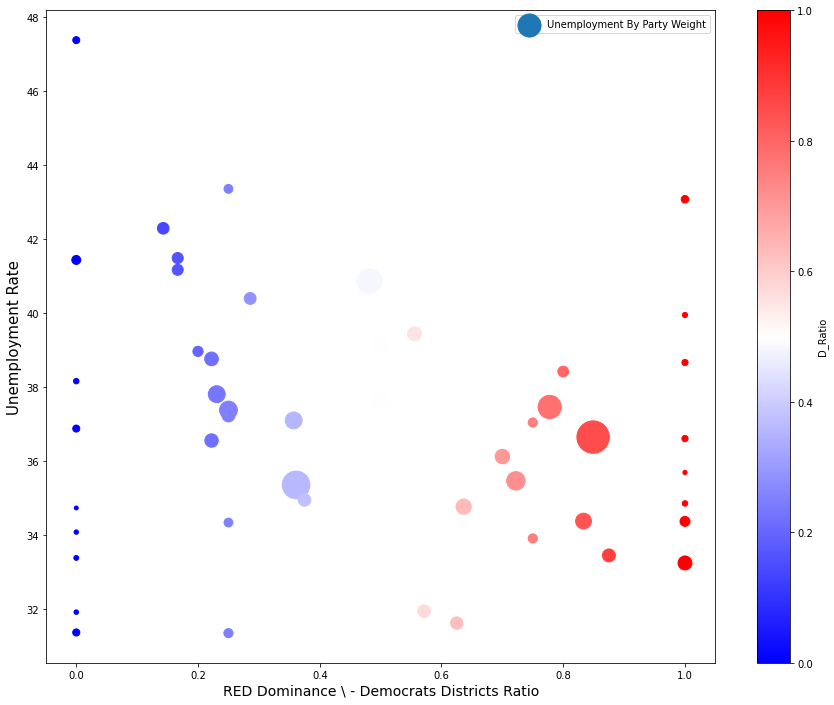

In [44]:
## Democratic districts ration vs Unemployment Rate

s1= df_state['Total Households']/30000
fig_e2, ax = plt.subplots(figsize=(15, 12))
df_state.plot.scatter(x='D_Ratio', y='Unemployment Rate', c='D_Ratio',colormap='bwr',s=s1,label='Unemployment By Party Weight', ax=ax)
plt.xlabel("RED Dominance \ - Democrats Districts Ratio", fontsize=14)
plt.ylabel("Unemployment Rate", fontsize=15)
plt.legend()
plt.show()

In [45]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [46]:
## State Level Geo Map

merged_df['State_Code'] = merged_df.State.map(us_state_to_abbrev)

fig_35 = px.choropleth(merged_df, locations='State_Code', locationmode="USA-states", scope="usa", color='% of households not in labor force',color_continuous_scale="viridis",range_color=(25, 55) )
fig_35.show()

## District level Geomap

api='https://theunitedstates.io/districts/states/NY/shape.geojson'
with request.urlopen(api) as f:
   geo = json.load(f)

#fig = px.choropleth_mapbox(acs_df,geojson=geo,locations='district number',color='RENTAL',color_continuous_scale="Viridis",range_color=(0, 10000), mapbox_style="carto-positron", zoom=6, center={"lat": 41.0, "lon": -78.0}, opacity=0.3, labels={'Total Population':'Population'}, range_color=(0, 55))
#fig.update_layout(autosize=False, height=600, width=1000, margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()


# Was thinking one problem with the map is that we are inputting district level data into a map that should show state level data
-Max

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored